In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load RF model

In [2]:
RF_score = 'gini'
yr_start = 2019
yr_end = 2021
mask = 'SIMPLE_MASK'
stand_str = 'STANDARDIZED'
RI_thresh = 30
weights = 'default'
N_samples_RF = 10
scoring = 'f1_weighted'
#RF_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/AL_EP_2019-2021_ONLY'
RF_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/'
RF_ext = '_{RF_score}_SHIPS_VALID_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{scoring}.csv'.format(RF_score='Random Forest',yr_start=yr_start,yr_end=yr_end,mask=mask,
            stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,scoring=scoring)


In [3]:
RF_dir+'PREDICTED_Y_vals'+RF_ext

'~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/PREDICTED_Y_vals_Random Forest_SHIPS_VALID_RI_vs_no_RI_2019-2021_SIMPLE_MASK_STANDARDIZED_RI_thresh_30weights_default_wts_f1_weighted.csv'

##### Load LR Model

In [4]:
LR_models = ['lbfgs']#,'saga']
valid_yr_start = 2019
valid_yr_end = 2021
#N_samples_LR = 15
#LR_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/AL_EP_2019-2021_ONLY'
LR_dir = '~/SHIPS/SHIPS_clean/Model_Results/VALIDATION/'
LR_ext1 = '_{model}_SHIPS_VALID_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
'{weights}_wts_{scoring}.csv'.format(model=LR_models[0],yr_start=valid_yr_start,
                                            yr_end=valid_yr_end,mask=mask,
                                  stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,scoring=scoring)
#LR_ext2 = '_{model}_SHIPS_VALID_RI_vs_no_RI_{yr_start}-{yr_end}_{mask}_{stand_str}_RI_thresh_{RI_thresh}weights_'\
#'{weights}_wts_{scoring}.csv'.format(model=LR_models[1],yr_start=valid_yr_start,yr_end=valid_yr_end,mask=mask,
 #                                 stand_str=stand_str,RI_thresh=RI_thresh,weights=weights,scoring=scoring)

In [5]:
y_pred_LR1 = pd.read_csv(LR_dir+'PREDICTED_Y_vals'+LR_ext1)
y_pred_LR1 = y_pred_LR1.rename(columns={'Y test':'Y true'})
#y_pred_LR2 = pd.read_csv(LR_dir+'PREDICTED_Y_vals'+LR_ext2)
y_pred_RF = pd.read_csv(RF_dir+'PREDICTED_Y_vals'+RF_ext)
y_pred_RF = y_pred_RF.rename(columns={'Y test':'Y true'})
y_pred_res = pd.concat([y_pred_RF,y_pred_LR1])#,y_pred_LR2])

In [6]:
#y_pred_res['Predicted Basin'] = y_pred_res['Predicted Basin'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)
#y_pred_res['BASIN'] = y_pred_res['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)


In [7]:
#y_pred_res

##### Load SHIPS-RII

In [8]:
yr_sel = [2020]#,2021]
best_track = pd.DataFrame()
e_deck = pd.DataFrame()
for iyr in yr_sel:
    ibest_track = pd.read_csv('DATA/best_tracks_{year_sel}.csv'.format(year_sel=iyr))
    ie_deck = pd.read_csv('DATA/etracks_RI_{year_sel}.csv'.format(year_sel=iyr))
    #if iyr == 2021:
        #ie_deck = ie_deck.rename(columns={'ProbFormat':})
    #
    e_deck = e_deck.append(ie_deck)
    best_track = best_track.append(ibest_track)
####
best_track = best_track.drop(columns={'Unnamed: 0','TECHNUM','DEPTH','SEASCODE','WINDCODE','SEAS','SEAS1','SEAS2',
                                     'P Outer','R Outer','SUBREGION','MAXSEAS','INITIALS','SEAS3','SEAS4'})
best_track['DATE'] = pd.to_datetime(best_track['DATE']).dt.date#.set_index(['BASIN','DATE','NAME'])#.head(20)
#
best_track['BASIN'] = best_track['BASIN'].replace({'AL':'ATLANTIC','EP':'EAST_PACIFIC'})
#
e_deck = e_deck.drop(columns={'Initials','Unnamed: 0'})
best_track = best_track[best_track['RAD']==34]


In [9]:
ie_deck
e_deck

,BASIN,CYCLONE NO,DATE,ProbFormat,Tech,TAU,LAT,LON,ProbItem,Intensity Change,V,RIstartTAU,RIstopTAU
0,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,12,145N,225W,2,20,45,0,12
1,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,24,145N,225W,5,25,50,0,24
2,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,24,145N,225W,1,30,55,0,24
3,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,24,145N,225W,0,35,60,0,24
4,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,24,145N,225W,0,40,65,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144903,ATLANTIC,03,2020-06-08 12:00:00,RI,RIOL,24,318N,916W,0,35,65,0,24
144904,ATLANTIC,03,2020-06-08 12:00:00,RI,RIOL,24,318N,916W,0,40,70,0,24
144905,ATLANTIC,03,2020-06-08 12:00:00,RI,RIOL,36,318N,916W,0,45,75,0,36
144906,ATLANTIC,03,2020-06-08 12:00:00,RI,RIOL,48,318N,916W,0,55,85,0,48


In [10]:
e_deck['BASIN'] = e_deck['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)
best_track['BASIN'] = best_track['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

#### Load 2019

In [11]:
yr_sel = 2019
load_edeck_2019 = 'DATA/SHIPS_RII_rapid_intense_probs_{yr}.csv'.format(yr=2019)
edeck_2019 = pd.read_csv(load_edeck_2019)
##
for iyr in [2019,2020]:#,2021]:
    ibest_track = pd.read_csv('DATA/best_tracks_{year_sel}.csv'.format(year_sel=iyr))
    #ie_deck = pd.read_csv('DATA/etracks_RI_{year_sel}.csv'.format(year_sel=iyr))
    #
    #e_deck = e_deck.append(ie_deck)
    best_track = best_track.append(ibest_track)

In [12]:
#e_deck['CYCLONE NO'].unique()
edeck_2019['BASIN'] = edeck_2019['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)
best_track['BASIN'] = best_track['BASIN'].replace('SOUTH_PACIFIC','SOUTHERN_HEM',regex=True)

In [13]:
e_deck['ATCF BASIN'] = e_deck['BASIN']
e_deck['ATCF BASIN'] = e_deck['ATCF BASIN'].replace('ATLANTIC','AL',regex=True)
e_deck['ATCF BASIN'] = e_deck['ATCF BASIN'].replace('EAST_PACIFIC','EP',regex=True)
e_deck['ATCF BASIN'] = e_deck['ATCF BASIN'].replace('CENTRAL_PACIFIC','CP',regex=True)
#
e_deck['ATCF Year'] = pd.to_datetime(e_deck['DATE']).dt.year


In [14]:
e_deck['ATCF ID'] = e_deck['ATCF BASIN'] + e_deck['CYCLONE NO'].astype(str) + e_deck['ATCF Year'].astype(str)

In [15]:
e_deck['ATCF BASIN'] + e_deck['CYCLONE NO'].astype(str)

0         ALC7
1         ALC7
2         ALC7
3         ALC7
4         ALC7
          ... 
144903    AL03
144904    AL03
144905    AL03
144906    AL03
144907    AL03
Length: 144908, dtype: object

In [16]:
e_deck.columns
e_deck = e_deck.rename(columns={'ProbItem':'30/24'})

In [17]:
edeck_2019.columns
edeck_2019 = edeck_2019.drop(columns={'Unnamed: 0','Date_full'})
edeck_2019 = edeck_2019.rename(columns={'Cyclone No':'CYCLONE NO','Date':'DATE','d_I':'Intensity Change',
                                       'V_final':'V','RI start time':'RIstartTAU','RI end time':'RIstopTAU',
                                       'LAT_0':'LAT','LON_0':'LON','RI Type':'Tech'})

In [18]:
edeck_2019

,BASIN,CYCLONE NO,Prob Item,Tech,TAU,LAT,LON,30/24,Intensity Change,V,RIstartTAU,RIstopTAU,ATCF ID,DATE
0,ATLANTIC,1.0,RI,RIOB,24.0,286N,687W,0.0,30.0,35.0,0.0,24.0,AL012019,2019-05-20 18:00:00
1,ATLANTIC,1.0,RI,RIOB,24.0,298N,690W,0.0,30.0,35.0,0.0,24.0,AL012019,2019-05-21 06:00:00
2,ATLANTIC,1.0,RI,RIOB,24.0,307N,692W,0.0,30.0,30.0,0.0,24.0,AL012019,2019-05-21 12:00:00
3,ATLANTIC,1.0,RI,RIOB,24.0,307N,688W,0.0,30.0,30.0,0.0,24.0,AL012019,2019-05-21 18:00:00
4,ATLANTIC,1.0,RI,Consensus,24.0,286N,687W,5.0,30.0,35.0,0.0,24.0,AL012019,2019-05-20 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2683,EAST_PACIFIC,21.0,RI,RII,24.0,110N,1036W,5.0,30.0,25.0,0.0,24.0,EP212019,2019-11-17 18:00:00
2684,EAST_PACIFIC,21.0,RI,RII,24.0,118N,1043W,4.0,30.0,25.0,0.0,24.0,EP212019,2019-11-18 00:00:00
2685,EAST_PACIFIC,21.0,RI,RII,24.0,122N,1048W,3.0,30.0,25.0,0.0,24.0,EP212019,2019-11-18 06:00:00
2686,EAST_PACIFIC,21.0,RI,RII,24.0,123N,1053W,2.0,30.0,25.0,0.0,24.0,EP212019,2019-11-18 12:00:00


##### Get 24-hour changes in VMAX for best tracks
Get 24-hour changes in VMAX. Mask out cases where Timedelta > 1 Day (aka, going from one case to another). 

In [19]:
ships = best_track.set_index(['BASIN','CYCLONE NO','NAME','TIME'])#.sort_values(['DATE'])
init_hr = 0 
nlev = ships.index.nlevels
SHIPS_t0 = ships
SHIPS_t24 = SHIPS_t0.shift(-4)
pred_num = ['VMAX','MSLP']
date_diff = pd.to_datetime(SHIPS_t24['DATE']) - pd.to_datetime(SHIPS_t0['DATE'])
diff = SHIPS_t24[['VMAX','MSLP']] -  SHIPS_t0[['VMAX','MSLP']]
diff = diff.where(date_diff == pd.Timedelta(1,'D'))#
best_track_diffs = ships.copy()
best_track_diffs[['d24_VMAX','d24_MSLP']] = diff[['VMAX','MSLP']]

In [20]:
#edeck_2019 = edeck_2019[edeck_2019['Tech'].isin(['RIOL','RIOC'])]
edecks_ALL = pd.concat([edeck_2019,e_deck])

In [21]:
edecks_ALL
e_deck

,BASIN,CYCLONE NO,DATE,ProbFormat,Tech,TAU,LAT,LON,30/24,Intensity Change,V,RIstartTAU,RIstopTAU,ATCF BASIN,ATCF Year,ATCF ID
0,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,12,145N,225W,2,20,45,0,12,AL,2020,ALC72020
1,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,24,145N,225W,5,25,50,0,24,AL,2020,ALC72020
2,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,24,145N,225W,1,30,55,0,24,AL,2020,ALC72020
3,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,24,145N,225W,0,35,60,0,24,AL,2020,ALC72020
4,ATLANTIC,C7,2020-09-12 12:00:00,RI,EIOB,24,145N,225W,0,40,65,0,24,AL,2020,ALC72020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144903,ATLANTIC,03,2020-06-08 12:00:00,RI,RIOL,24,318N,916W,0,35,65,0,24,AL,2020,AL032020
144904,ATLANTIC,03,2020-06-08 12:00:00,RI,RIOL,24,318N,916W,0,40,70,0,24,AL,2020,AL032020
144905,ATLANTIC,03,2020-06-08 12:00:00,RI,RIOL,36,318N,916W,0,45,75,0,36,AL,2020,AL032020
144906,ATLANTIC,03,2020-06-08 12:00:00,RI,RIOL,48,318N,916W,0,55,85,0,48,AL,2020,AL032020


##### Bin e-deck RI probabilities by 10s 
Round the e-deck RI probabilities to the nearest 10. (RI probability of 0-5 will go into 5% bin). We identify the desired intensity change, and determine the probability of RI ($ProbItem$) at that intensity change ($Intensity Chnage$).  Also make sure we are at the 24 hour threshold ($RIstartTAU = 0$, $RIstopTAU = 24$). 

Then, we will find corresponding best tracks for each probability bin.  We will count up the number of days that actually saw RI. 

In [22]:
RI_thresh = 30
tech_sel = ['RIOD','RIOC']
e_decks_trim = edecks_ALL.where((edecks_ALL['RIstartTAU']==0) & (edecks_ALL['RIstopTAU']==24)).dropna(how='all')
e_decks_trim = e_decks_trim[e_decks_trim['Tech'].isin(tech_sel)]
#e_decks_trim = e_decks_trim.rename(columns={'Tech':'Model'})
e_decks_trim = e_decks_trim[e_decks_trim['Intensity Change']==RI_thresh]
#
e_decks_trim['Prob. RI'] = e_decks_trim['30/24'].round(-1)
e_decks_trim['Prob. RI'] = e_decks_trim['Prob. RI'].mask(e_decks_trim['30/24'] <= 5, 5)
#
e_decks_trim['TIME'] = pd.to_datetime(e_decks_trim['DATE']).dt.hour
e_decks_trim['DATE'] = pd.to_datetime(e_decks_trim['DATE']).dt.date


In [23]:

e_decks_trim['DATE_full'] = pd.to_datetime(e_decks_trim['DATE']) + pd.to_timedelta(e_decks_trim['TIME'],'hours')
#e_decks_trim['DATE_full']
#pd.to_datetime(e_decks_trim['DATE'])+ 


In [24]:
e_decks_trim

,BASIN,CYCLONE NO,Prob Item,Tech,TAU,LAT,LON,30/24,Intensity Change,V,RIstartTAU,RIstopTAU,ATCF ID,DATE,ProbFormat,ATCF BASIN,ATCF Year,Prob. RI,TIME,DATE_full
8,ATLANTIC,1.0,RI,RIOD,24.0,286N,687W,14.0,30.0,35.0,0.0,24.0,AL012019,2019-05-20,NaN,NaN,NaN,10.0,18,2019-05-20 18:00:00
9,ATLANTIC,1.0,RI,RIOD,24.0,298N,690W,0.0,30.0,35.0,0.0,24.0,AL012019,2019-05-21,NaN,NaN,NaN,5.0,6,2019-05-21 06:00:00
10,ATLANTIC,1.0,RI,RIOD,24.0,307N,692W,12.0,30.0,30.0,0.0,24.0,AL012019,2019-05-21,NaN,NaN,NaN,10.0,12,2019-05-21 12:00:00
11,ATLANTIC,1.0,RI,RIOD,24.0,307N,688W,0.0,30.0,30.0,0.0,24.0,AL012019,2019-05-21,NaN,NaN,NaN,5.0,18,2019-05-21 18:00:00
50,ATLANTIC,2.0,RI,RIOD,24.0,283N,870W,13.0,30.0,25.0,0.0,24.0,AL022019,2019-07-10,NaN,NaN,NaN,10.0,18,2019-07-10 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144766,ATLANTIC,03,NaN,RIOD,24.0,298N,897W,12.0,30.0,75.0,0.0,24.0,AL032020,2020-06-08,RI,AL,2020.0,10.0,0,2020-06-08 00:00:00
144806,ATLANTIC,03,NaN,RIOC,24.0,304N,906W,3.0,30.0,65.0,0.0,24.0,AL032020,2020-06-08,RI,AL,2020.0,5.0,6,2020-06-08 06:00:00
144814,ATLANTIC,03,NaN,RIOD,24.0,304N,906W,9.0,30.0,65.0,0.0,24.0,AL032020,2020-06-08,RI,AL,2020.0,10.0,6,2020-06-08 06:00:00
144886,ATLANTIC,03,NaN,RIOC,24.0,318N,916W,3.0,30.0,60.0,0.0,24.0,AL032020,2020-06-08,RI,AL,2020.0,5.0,12,2020-06-08 12:00:00


In [66]:
y_pred_res_trim = y_pred_res[y_pred_res['Predicted Basin'].isin(['ATLANTIC','EAST_PACIFIC','CENTRAL_PACIFIC'])]
e_decks_trim = e_decks_trim[e_decks_trim['DATE_full'].isin(y_pred_res_trim['DATE_full'])]

In [69]:
e_decks_trim.groupby(['BASIN','Tech','Prob. RI']).count()
#y_pred_res.set_index(['DATE_full']).xs('2020-10-06 06:00:00')


CYCLONE NO  Prob Item  TAU  LAT  LON  30/24  \
BASIN        Tech Prob. RI                                                
ATLANTIC     RIOC 5.0              168          0  168  168  168    168   
                  10.0             144          0  144  144  144    144   
                  20.0              39          0   39   39   39     39   
                  30.0              11          0   11   11   11     11   
                  40.0               2          0    2    2    2      2   
             RIOD 5.0              150         34  150  150  150    150   
                  10.0             239         63  239  239  239    239   
                  20.0              84         26   84   84   84     84   
                  30.0              20          9   20   20   20     20   
                  40.0               9          6    9    9    9      9   
EAST_PACIFIC RIOC 5.0               49          0   49   49   49     49   
                  10.0              17          0   17   17   17     17   
                  20.0              11          0   11   11   11     11   
                  30.0               6          0    6    6    6      6   
                  40.0               1          0    1    1    1      1   
                  50.0               2          0    2    2    2      2   
                  80.0               1          0    1    1    1      1   
             RIOD 5.0               77         40   77   77   77     77   
                  10.0              14          6   14   14   14     14   
                  20.0              44         26   44   44   44     44   
                  30.0              41         30   41   41   41     41   
                  40.0              20         11   20   20   20     20   
                  50.0               6          4    6    6    6      6   
                  60.0               2          1    2    2    2      2   
                  70.0               3          3    3    3    3      3   
                  90.0               1          0    1    1    1      1   

                            Intensity Change    V  RIstartTAU  RIstopTAU  \
BASIN        Tech Prob. RI                                                 
ATLANTIC     RIOC 5.0                    168  168         168        168   
                  10.0                   144  144         144        144   
                  20.0                    39   39          39         39   
                  30.0                    11   11          11         11   
                  40.0                     2    2           2          2   
             RIOD 5.0                    150  150         150        150   
                  10.0                   239  239         239        239   
                  20.0                    84   84          84         84   
                  30.0                    20   20          20         20   
                  40.0                     9    9           9          9   
EAST_PACIFIC RIOC 5.0                     49   49          49         49   
                  10.0                    17   17          17         17   
                  20.0                    11   11          11         11   
                  30.0                     6    6           6          6   
                  40.0                     1    1           1          1   
                  50.0                     2    2           2          2   
                  80.0                     1    1           1          1   
             RIOD 5.0                     77   77          77         77   
                  10.0                    14   14          14         14   
                  20.0                    44   44          44         44   
                  30.0                    41   41          41         41   
                  40.0                    20   20          20         20   
                  50.0                     6    6           6          6   
                  60.0     

##### Reliability for e-decks

In [26]:
pct_range = e_decks_trim['Prob. RI'].unique().tolist()
reliability_edecks = pd.DataFrame()
#
models_sel = ['RIOC','RIOD']
#i_model = 'RIOD'
#ipct = 50
for i_model in models_sel:
    i_e_decks_trim = e_decks_trim.set_index(['Tech']).xs(i_model).reset_index()
    for ipct in pct_range:
        if not ipct in i_e_decks_trim.set_index(['Prob. RI']).index:
            continue
        else:
            edeck_sel = i_e_decks_trim.set_index(['Prob. RI','BASIN','CYCLONE NO','DATE','TIME']).xs(ipct)
            bdeck_sel = best_track_diffs.reset_index().set_index(['BASIN','CYCLONE NO','DATE','TIME'])
            bdeck_sel['Y true'] = 0
            bdeck_sel['Y true'] = bdeck_sel['Y true'].mask(bdeck_sel['d24_VMAX']>= RI_thresh,1)
            b_ind = bdeck_sel.index.to_list()
            e_ind = edeck_sel.index.to_list()
            ind_both = set(b_ind)&set(e_ind)
            #
            bdeck_trim = bdeck_sel.loc[ind_both]
            edeck_trim = edeck_sel.loc[ind_both]
            total_days = edeck_trim.reset_index().groupby(['BASIN']).count()
            no_RI = bdeck_trim.groupby(['BASIN'])['Y true'].sum()
            # pct = 100*(no_RI/total_days)
            #
            i_df = pd.DataFrame(index=total_days.index,columns={'Observed Pct','Predicted Pct'})
            # 
            if len(no_RI) == 0:
                pct = 0
                i_df['Observed Pct'] = 0
                i_df['Observed No. RI'] = 0
            else:
                pct = 100*(no_RI/total_days['V'])
                i_df['Observed Pct'] = pct
                i_df['Observed No. RI'] = no_RI
            #
            i_df['Predicted Pct'] = ipct
            i_df['Observed No Total'] = total_days['V']
            i_df['Model'] = i_model
            reliability_edecks = reliability_edecks.append(i_df)
###

In [27]:
i_e_decks_trim.set_index(['BASIN']).xs('ATLANTIC')['Prob. RI'].unique()

array([20., 10., 40., 30.,  5., 70., 60.])

In [28]:
reliability_edecks['Model'] = reliability_edecks['Model'].replace('RIOC','Consensus')
reliability_edecks['Model'] = reliability_edecks['Model'].replace('RIOD','SHIPS-RII')

In [29]:
edeck_sel = i_e_decks_trim.set_index(['Prob. RI','BASIN','CYCLONE NO','DATE','TIME']).xs(ipct)

In [30]:
#y_pred_res = y_pred_res.rename(columns={'Y test':'Y true'})
y_pred_res['Y pred probab (class: 1)'] = y_pred_res['Y pred probab (class: 1)']*100

In [31]:
y_pred_res['RI prob'] = (y_pred_res['Y pred probab (class: 1)']).round(-1)

In [32]:
y_pred_res['RI prob'] = y_pred_res['RI prob'].mask(y_pred_res['RI prob'] <= 5, 5)

In [33]:
y_pred_res = y_pred_res.drop(columns={'BASIN','Unnamed: 0'})
# y_pred_res = y_pred_res[y_pred_res['Predicted Basin']!='ALL']

In [34]:
pct_range = y_pred_res['RI prob'].unique().tolist()
reliability = pd.DataFrame()
for ipct in pct_range:
    # ipct = 10
    if ipct == 100:
        continue
    y_sel = y_pred_res.set_index(['RI prob']).xs(ipct)
    total = y_sel.groupby(['Predicted Basin','Model']).count()
    RI = y_sel[y_sel['Y true']==1].groupby(['Predicted Basin','Model']).count()
    i_df = pd.DataFrame(index=total.index,columns={'Observed Pct','Predicted Pct'})
    if len(RI) == 0:
        pct = 0
        i_df['Observed Pct'] = 0
        i_df['Observed No. RI'] = 0
    else:
        pct = 100*(RI/total)
        i_df['Observed Pct'] = pct['CASE']
        i_df['Observed No. RI'] = RI['CASE']
    i_df['Predicted Pct'] = ipct
    i_df['Observed No Total'] = total['CASE']
    reliability = reliability.append(i_df)

In [35]:
reliability = reliability.mask(reliability.isna(),0)

/home/mmcgraw/miniconda3/envs/SHIPS/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Prob. RI', ylabel='Density'>

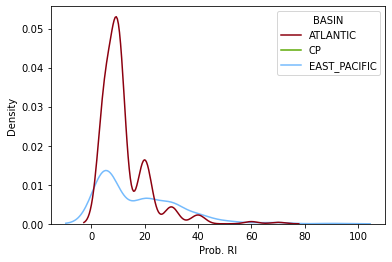

In [60]:
sns.kdeplot(data=e_decks_trim.set_index(['Tech']).xs('RIOD').reset_index(),x='Prob. RI',hue='BASIN')

In [37]:
reliability#.xs(('ALL','Random Forest')).sort_values(['Predicted Pct'])
palette = {'xkcd:crimson','xkcd:leaf green','xkcd:goldenrod','xkcd:sky blue'}#,'xkcd:olive'}
basin_ALL = reliability.reset_index()['Predicted Basin'].unique().tolist()
#foo = reliability.xs(('ALL'))
#foo2 = foo.xs(~'lbfgs').sort_values(['Predicted Pct'])
#foo = reliability.xs('ALL').reset_index()
#foo = foo[foo['Model']!='lbfgs']
#foo
reliability
# y_pred_res.set_index(['RI prob','Predicted Basin','Model']).xs((10,'ATLANTIC','Random Forest'))

Predicted Pct  Observed Pct  Observed No. RI  \
Predicted Basin Model                                                         
ALL             Random Forest            5.0      0.000000              0.0   
                lbfgs                    5.0      3.030303              2.0   
ATLANTIC        Random Forest            5.0      0.000000              0.0   
                lbfgs                    5.0      0.000000              0.0   
EAST_PACIFIC    lbfgs                    5.0      0.000000              0.0   
...                                      ...           ...              ...   
ALL             lbfgs                   90.0     38.095238              8.0   
ATLANTIC        lbfgs                   90.0     33.333333              1.0   
EAST_PACIFIC    lbfgs                   90.0     25.000000              1.0   
SOUTH_PACIFIC   lbfgs                   90.0     25.000000              2.0   
WEST_PACIFIC    lbfgs                   90.0     66.666667              4.0   

                               Observed No Total  
Predicted Basin Model                             
ALL             Random Forest                 21  
                lbfgs                         66  
ATLANTIC        Random Forest                 12  
                lbfgs                         23  
EAST_PACIFIC    lbfgs                          6  
...                                          ...  
ALL             lbfgs                         21  
ATLANTIC        lbfgs                          3  
EAST_PACIFIC    lbfgs                          4  
SOUTH_PACIFIC   lbfgs                          8  
WEST_PACIFIC    lbfgs                          6  

[94 rows x 4 columns]

In [38]:
reliability_edecks = reliability_edecks.reset_index().rename(columns={'BASIN':'Predicted Basin'}).set_index(['Predicted Basin','Model'])
reliability_ALL = pd.concat([reliability,reliability_edecks])

In [39]:
RF_consensus = reliability_ALL.xs(('Random Forest'),level=1).reset_index().sort_values('Predicted Pct')
RF_consensus = RF_consensus[RF_consensus['Predicted Basin'].isin(['ATLANTIC','EAST_PACIFIC'])]
RF_consensus = RF_consensus.set_index(['Predicted Basin','Predicted Pct'])
RF_consensus.loc[('EAST_PACIFIC',5),:] = 0
RII_consensus = reliability_ALL.xs(('SHIPS-RII'),level=1).reset_index().set_index(['Predicted Basin','Predicted Pct'])
#RII_consensus.loc[('ATLANTIC',50),:] = 0
#RII_consensus.loc[('ATLANTIC',80),:] = 0
#RII_consensus.loc[('EAST_PACIFIC',70),:] = 0
RF_RII_consensus = pd.concat((RF_consensus.replace(0,np.nan),RII_consensus.replace(0,np.nan))).mean(level=(0,1))
RF_RII_consensus = RF_RII_consensus.reset_index().set_index(['Predicted Basin'])


In [40]:
RII_consensus.xs('ATLANTIC')
#RF_consensus.xs(('ATLANTIC',80))
#reliability_ALL.xs('EAST_PACIFIC').reset_index().set_index(['Predicted Pct','Model'])

,Observed Pct,Observed No. RI,Observed No Total
Predicted Pct,,,
20.0,6.666667,2.0,30
10.0,2.439024,2.0,82
40.0,33.333333,2.0,6
30.0,14.285714,1.0,7
5.0,0.000000,0.0,80
70.0,100.000000,2.0,2
60.0,0.000000,0.0,3


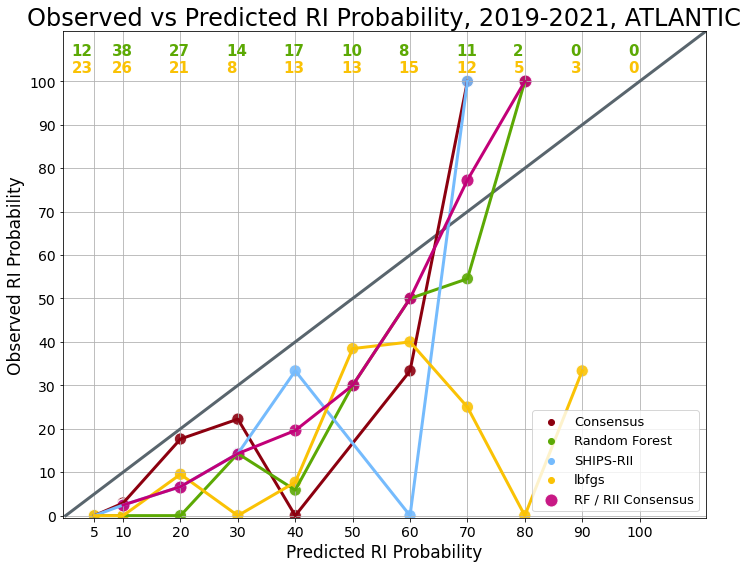

In [42]:
#for basin_sel in basin_ALL:
basin_sel = 'ATLANTIC'
fig1,ax1 = plt.subplots(1,1,figsize=(10,8))
#basin_sel = 'ALL'
ax1.plot([0,111.5],[0,111.5],linewidth=3,color='xkcd:slate grey')
sns.scatterplot(data=reliability_ALL.xs(basin_sel).reset_index().sort_values('Model'),x='Predicted Pct',y='Observed Pct',hue='Model',
                palette=sns.set_palette(palette),ax=ax1,s=150,alpha=0.9)
sns.lineplot(data=reliability_ALL.xs(basin_sel).reset_index().sort_values('Model'),x='Predicted Pct',y='Observed Pct',
            hue='Model',palette=sns.set_palette(palette),ax=ax1,linewidth=3,legend=False)
sns.scatterplot(data=RF_RII_consensus.xs(basin_sel),x='Predicted Pct',y='Observed Pct',color='xkcd:magenta',ax=ax1,
               s=170,alpha=0.9,label='RF / RII Consensus')
sns.lineplot(data=RF_RII_consensus.xs(basin_sel).reset_index(),x='Predicted Pct',y='Observed Pct',
             color='xkcd:magenta',ax=ax1,linewidth=3,legend=False)
#sns.scatterplot(data=foo,x='Predicted Pct',y='Observed Pct',hue='Model',
 #              palette=sns.set_palette(palette),ax=ax1,s=150,alpha=0.8)    
ax1.set_ylim([-0.5,111.5])
ax1.set_xlim([-0.5,111.5])
ax1.set_xticks(pct_range)
ax1.set_yticks(np.arange(0,101,10))
ax1.tick_params(axis='y',labelsize=14)
ax1.tick_params(axis='x',labelsize=14)
ax1.legend(fontsize=13,loc='lower right')
ax1.set_xlabel('Predicted RI Probability',fontsize=17)
ax1.set_ylabel('Observed RI Probability',fontsize=17)
plt_nums = reliability_ALL.xs(basin_sel).sort_values(['Predicted Pct']).reset_index().set_index(['Predicted Pct'])
ax1.grid()
# 
totals = reliability_ALL.xs(basin_sel).reset_index().sort_values('Predicted Pct').set_index(['Model','Predicted Pct'])
models_list = reliability_ALL.reset_index()['Model'].unique().tolist()
for i in ['Random Forest','lbfgs']:#,'saga']:
    mod_sel = totals.xs(i)
    for i_pct in pct_range:
        if i_pct in mod_sel.index:
            imod = mod_sel.xs(i_pct)['Observed No Total'].astype(int)
        else:
            imod = 0
        if i == 'Random Forest':
            yval = (101+5)
            i_color = sns.color_palette()[1]
        elif i == 'lbfgs':
            yval = (97+5)
            i_color = sns.color_palette()[3]
        elif i == 'saga':
            yval = (102+5 if i_pct < 90 else 91 -6)
            i_color = sns.color_palette()[2]
        #elif i == 'RIOC':
         #   yval = (97+5 if i_pct < 90 else 91 -6)
          #  i_color = sns.color_palette()[3]
        #elif i == 'RIOD':
         #   yval = (89+5 if i_pct < 90 else 91 -6)
          #  i_color = sns.color_palette()[4]
        #
        ax1.text((i_pct-4 if i_pct == 5 else i_pct -2),yval,imod,color=i_color,fontsize=15,weight='semibold')
ax1.set_title('Observed vs Predicted RI Probability, 2019-2021, {basin_sel}'.format(basin_sel=basin_sel),fontsize=24)
fig1.tight_layout()
fig1.savefig('Figures/reliability_ML_models_ALL_2019_2021_{basin_sel}.png'.format(basin_sel=basin_sel),
                format='png',bbox_inches='tight',dpi=350)
    
    #fig1.savefig('Figures/reliability_ML_models_2020_{basin_sel}.pdf'.format(basin_sel=basin_sel),
     #           format='pdf',bbox_inches='tight')

In [44]:
reliability_ALL.xs('ATLANTIC')


,,,,Tech,Prob Item,TAU,LAT,LON,30/24,Intensity Change,V,RIstartTAU,RIstopTAU,ATCF ID,ProbFormat,ATCF BASIN,ATCF Year,DATE_full
BASIN,CYCLONE NO,DATE,TIME,,,,,,,,,,,,,,,
EAST_PACIFIC,12,2020-08-17,0,RIOD,NaN,24.0,121N,996W,90.0,30.0,75.0,0.0,24.0,EP122020,RI,EP,2020.0,2020-08-17


In [ ]:
reliability#_edecks
reliability_edecks = reliability_edecks.reset_index().rename(columns={'BASIN':'Predicted Basin'}).set_index(['Predicted Basin','Model'])

In [ ]:
plt_nums = reliability.xs(('ALL')).sort_values(['Predicted Pct']).reset_index().set_index(['Predicted Pct','Model'])
plt_nums.index.get_level_values(0)

In [ ]:
models_list = plt_nums.reset_index()['Model'].unique()
reliability_ALL#.reset_index()['Model'].unique()

In [ ]:
RF_consensus = reliability_ALL.xs(('Random Forest'),level=1).reset_index().sort_values('Predicted Pct')
RF_consensus = RF_consensus[RF_consensus['Predicted Basin'].isin(['ATLANTIC','EAST_PACIFIC'])]
RF_consensus = RF_consensus.set_index(['Predicted Basin','Predicted Pct'])
RF_consensus.loc[('EAST_PACIFIC',5),:] = 0
RII_consensus = reliability_ALL.xs(('SHIPS-RII'),level=1).reset_index().set_index(['Predicted Basin','Predicted Pct'])
RII_consensus.loc[('ATLANTIC',50),:] = 0
RII_consensus.loc[('ATLANTIC',80),:] = 0
RII_consensus.loc[('EAST_PACIFIC',70),:] = 0
RF_RII_consensus = (RF_consensus + RII_consensus)/2


In [ ]:
reliability_ALL.xs(('Random Forest'),level=1).reset_index().sort_values('Predicted Pct')
#RII_consensus
RF_RII_consensus
#RF_consensus
#RII_consensus